In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Pregunta 1

In [25]:
def sir_model_1(y, t, beta, gamma, mu, b):
    S, I, R = y
    N = S + I + R
    dSdt = -beta * S * I / N + b * N - mu * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    return [dSdt, dIdt, dRdt]

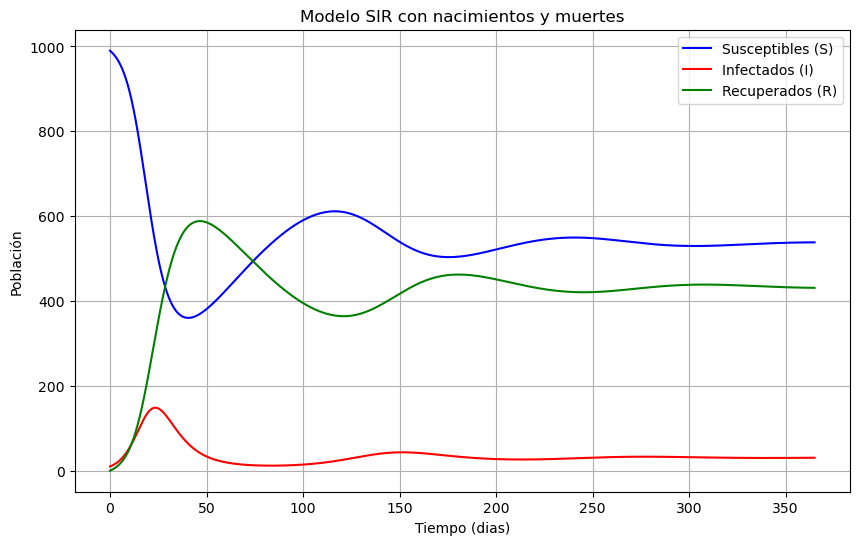

In [26]:

beta = 0.4
gamma = 0.2
mu = 1 / 70
b = 1 / 70

S0 = 990
I0 = 10
R0 = 0
y0 = [S0, I0, R0]

t = np.linspace(0, 365, 3000)

solution = odeint(sir_model_1, y0, t, args=(beta, gamma, mu, b))
S, I, R = solution.T

plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptibles (S)', color='blue')
plt.plot(t, I, label='Infectados (I)', color='red')
plt.plot(t, R, label='Recuperados (R)', color='green')
plt.title('Modelo SIR con nacimientos y muertes')
plt.xlabel('Tiempo (dias)')
plt.ylabel('Población')
plt.legend()
plt.grid()
plt.show()

Pregunta 2

In [27]:
def sir_vacuna2(y, t, beta, gamma, v, N):
    S, I, R = y
    dSdt = -beta * S * I / N - v * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + v * S
    return [dSdt, dIdt, dRdt]

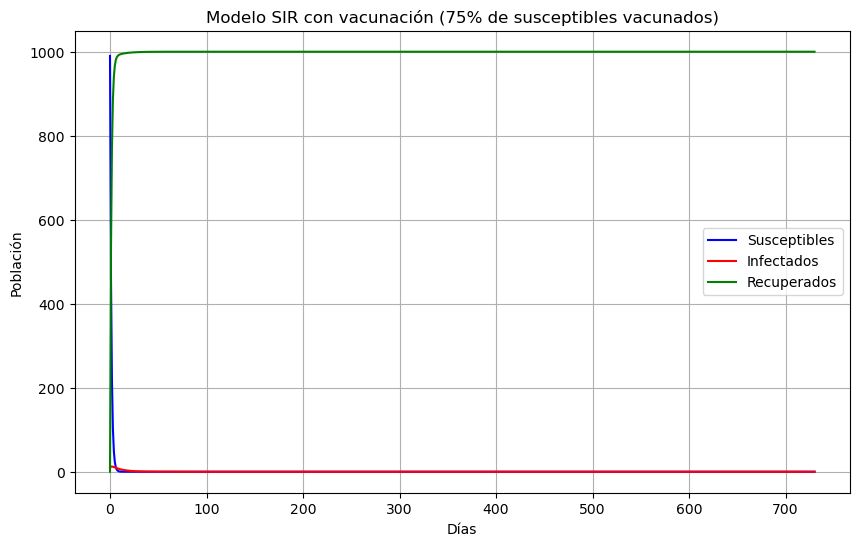

In [28]:
beta = 0.4
gamma = 0.1
v = 0.75
N = 1_000

S0 = 990
I0 = 10
R0 = 0
y0_vac = [S0, I0, R0]
t_vac = np.linspace(0, 730, 730)
result_vac = odeint(sir_vacuna2, y0_vac, t_vac, args=(beta, gamma, v, N))
S_vac, I_vac, R_vac = result_vac.T

plt.figure(figsize=(10, 6))
plt.plot(t_vac, S_vac, label='Susceptibles', color='blue')
plt.plot(t_vac, I_vac, label='Infectados', color='red')
plt.plot(t_vac, R_vac, label='Recuperados', color='green')
plt.title('Modelo SIR con vacunación (75% de susceptibles vacunados)')
plt.xlabel('Días')
plt.ylabel('Población')
plt.legend()
plt.grid()
plt.show()

Pregunta 3

In [29]:
def sir_model_3(y, t, beta, gamma, mu, b, N):
    S, I, R = y
    dSdt = -beta * S * I / N + b * N - mu * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    return [dSdt, dIdt, dRdt]

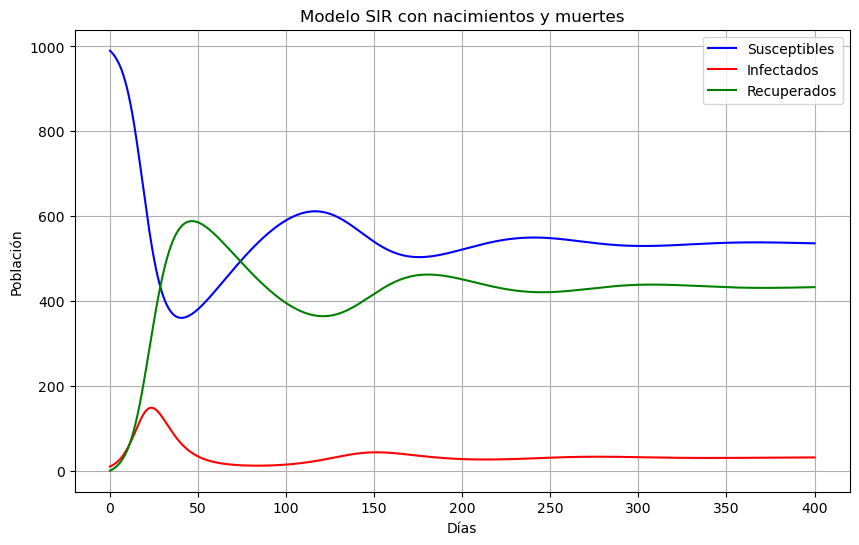

In [30]:
beta = 0.4
gamma = 0.2
mu = 1 / 70
b = 1 / 70
N = 1_000

S0 = 990
I0 = 10
R0 = 0
y0 = [S0, I0, R0]
t = np.linspace(0, 400, 3000)
result = odeint(sir_model_3, y0, t, args=(beta, gamma, mu, b, N))
S, I, R = result.T

plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptibles', color='blue')
plt.plot(t, I, label='Infectados', color='red')
plt.plot(t, R, label='Recuperados', color='green')
plt.title('Modelo SIR con nacimientos y muertes')
plt.xlabel('Días')
plt.ylabel('Población')
plt.legend()
plt.grid()
plt.show()

Pregunta 4

In [31]:
def sir_vacuna4(y, t, beta, gamma, v, N):
    S, I, R = y
    dSdt = -(1 - v) * beta * S * I / N
    dIdt = (1 - v) * beta * S * I / N - gamma * I
    dRdt = gamma * I + v * beta * S * I / N
    return [dSdt, dIdt, dRdt]


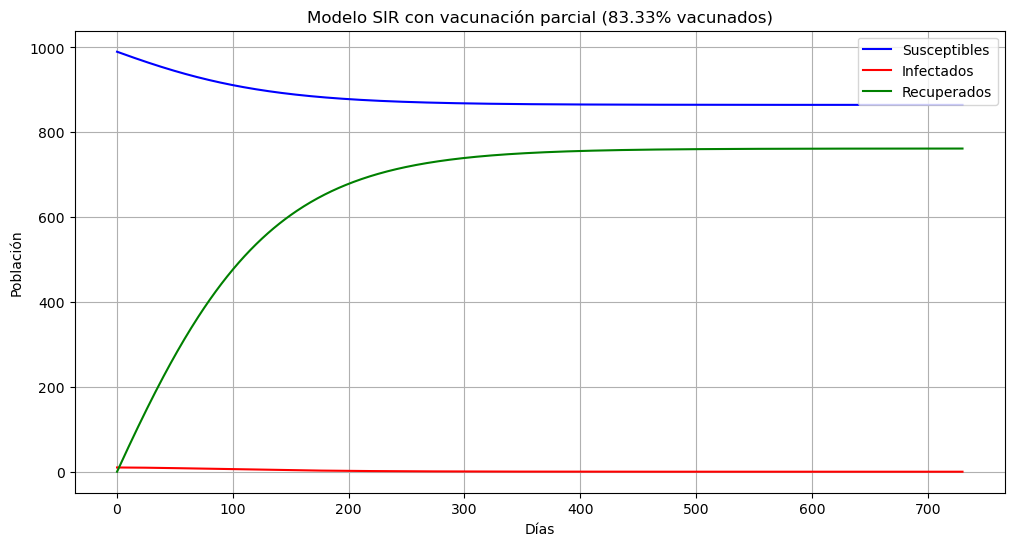

In [32]:
beta = 0.6
gamma = 0.1
v = 0.8333
N = 1000

S0 = 990
I0 = 10
R0 = 0
y0_partial_vac = [S0, I0, R0]

t_partial_vac = np.linspace(0, 730, 730)

result_partial_vac = odeint(sir_vacuna4, y0_partial_vac, t_partial_vac, args=(beta, gamma, v, N))
S_partial_vac, I_partial_vac, R_partial_vac = result_partial_vac.T

plt.figure(figsize=(12, 6))
plt.plot(t_partial_vac, S_partial_vac, label='Susceptibles', color='blue')
plt.plot(t_partial_vac, I_partial_vac, label='Infectados', color='red')
plt.plot(t_partial_vac, R_partial_vac, label='Recuperados', color='green')
plt.title('Modelo SIR con vacunación parcial (83.33% vacunados)')
plt.xlabel('Días')
plt.ylabel('Población')
plt.legend()
plt.grid()
plt.show()